# This code visualize scene graph annotations directly on the image

# Preamble

Set up paths and environment variables

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import json
import csv
import pandas as pd
import h5py
from tqdm import tqdm
from display_utils import show_all_rel_on_image

data_path = "../datasets"

vg150_h5 = h5py.File(os.path.join(data_path,"VG150/baseline/VG-SGG-with-attri.h5"), 'r')
vg150_dict = json.load(open(os.path.join(data_path,"VG150/baseline/VG-SGG-dicts-with-attri.json"), 'r'))

indoor_vg_dict = json.load(open(os.path.join(data_path,"IndoorVG/VG-SGG-dicts.json"), 'r'))
indoor_vg = h5py.File(os.path.join(data_path,"IndoorVG/VG-SGG-augmented.h5"), 'r')

image_data = json.load(open(os.path.join(data_path,"vg/image_data.json"), 'r'))

vg_img_path = '/home/maelic/Documents/Datasets/VG/VG_100K'

datasets = {'VG150': (vg150_h5, vg150_dict), 'IndoorVG': (indoor_vg, indoor_vg_dict)}

to_test = ['IndoorVG']
datasets_to_test = {k: datasets[k] for k in to_test}

# Show a random image from split

8994
58905
IndoorVG
108073
Image ID: 2361266
Relations: 

towel in front of wall, glass has shelf, shelf has sink, faucet on sink, shelf near sink, knob on sink, towel near sink, faucet has knob, faucet has knob, knob on faucet, 


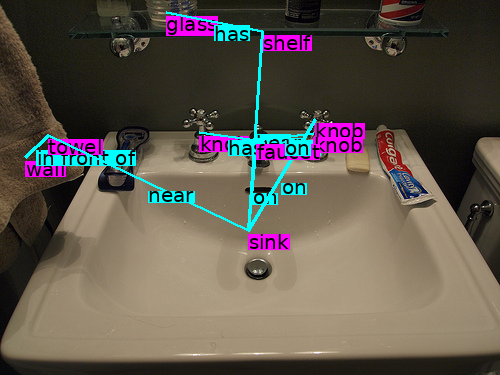

In [5]:
# get random image
data_split = indoor_vg['split_rel'][:]
split_mask = data_split == 0
split_mask &= indoor_vg['img_to_first_rel'][:] >= 0
image_index = np.where(split_mask)[0]
print(len(image_index))
img_idx = np.random.choice(image_index)
print(img_idx)

for dataset_name, (dataset_h5, dataset_dict) in datasets_to_test.items():
    print(dataset_name)
    print(len(dataset_h5['img_to_first_rel']))
    show_all_rel_on_image(image_data, dataset_h5, dataset_dict, img_idx, vg_img_path) # VG150 connected
